# **Modified Neural Network Implementation:**

## **Importing Required Libraries**

In [23]:
# Importing necessary libraries
import numpy as np  # For numerical computations
import pandas as pd  # For handling datasets
from sklearn.model_selection import train_test_split  # For splitting data into train/test sets
from sklearn.preprocessing import LabelBinarizer, StandardScaler  # For preprocessing data
from sklearn.metrics import classification_report, ConfusionMatrixDisplay  # For evaluating model performance
import tensorflow as tf  # For building and training the neural network
from tensorflow.keras.models import Sequential  # Sequential model API in Keras
from tensorflow.keras.layers import Dense  # Fully connected layers in Keras
import matplotlib.pyplot as plt  # For visualizations

# Ensuring reproducibility by setting random seeds
np.random.seed(42)
tf.random.set_seed(42)


## **Step 1: Load and Preprocess the Data**

In [8]:

# Load the Iris dataset
from sklearn.datasets import load_iris  # Iris dataset is part of scikit-learn
iris = load_iris()  # Load the dataset into memory
X = iris.data  # Features
y = iris.target  # Target labels
target_names = iris.target_names  # Names of target classes

# One-hot encode the labels (convert categorical to binary vectors)
encoder = LabelBinarizer()  # Initialize encoder
y_encoded = encoder.fit_transform(y)  # Fit and transform labels

# Standardize the features (scale to have mean 0 and variance 1)
scaler = StandardScaler()  # Initialize scaler
X_scaled = scaler.fit_transform(X)  # Fit and transform features

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.3, random_state=42)

# Print the number of samples in training and testing sets
print(f"Training samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")


Training samples: 105, Testing samples: 45



## **Step 2: Build the Neural Network**

In [9]:
# Build the modified neural network
modified_model = Sequential([
    Dense(8, activation='relu', input_shape=(X_train.shape[1],), name="Hidden_Layer_1"),  # First hidden layer
    Dense(16, activation='relu', name="Hidden_Layer_2"),  # New hidden layer with 16 neurons
    Dense(8, activation='relu', name="Hidden_Layer_3"),  # Third hidden layer
    Dense(y_train.shape[1], activation='softmax', name="Output_Layer")  # Output layer
])

# Compile the modified model
modified_model.compile(optimizer='adam',
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

# Display a summary of the modified model structure
modified_model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Hidden_Layer_1 (Dense)               │ (None, 8)                   │              40 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Hidden_Layer_2 (Dense)               │ (None, 16)                  │             144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Hidden_Layer_3 (Dense)               │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Output_Layer (Dense)                 │ (None, 3)                   │              27 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 347 (1.36 KB)

 Trainable params: 347 (1.36 KB)

 Non-trainable params: 0 (0.00 B)

## **Step 3: Train the Neural Network**
Training and Validation Loss/Accuracy.

Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.4720 - loss: 1.0764 - val_accuracy: 0.3810 - val_loss: 1.0712
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5342 - loss: 1.0568 - val_accuracy: 0.4286 - val_loss: 1.0515
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5962 - loss: 1.0373 - val_accuracy: 0.6667 - val_loss: 1.0309
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6503 - loss: 1.0163 - val_accuracy: 0.7619 - val_loss: 1.0099
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6778 - loss: 0.9935 - val_accuracy: 0.8095 - val_loss: 0.9879
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7498 - loss: 0.9690 - val_accuracy: 0.8571 - val_loss: 0.9615
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7724 - loss: 0.9421 - val_accuracy: 0.9048 - val_loss: 0.9334
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7965 - loss: 0.9126 - val_accuracy: 0.8571 - val_loss

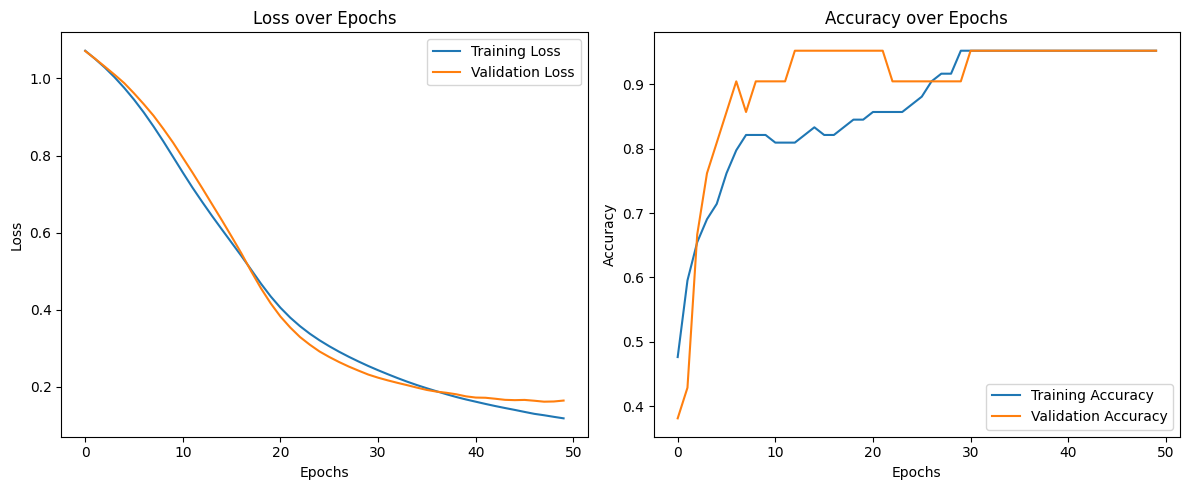

In [10]:

# Train the model
history = modified_model.fit(X_train, y_train, epochs=50, validation_split=0.2, batch_size=8, verbose=1)

# Plot training history
plt.figure(figsize=(12, 5))  # Set figure size

# Loss plot
plt.subplot(1, 2, 1)  # First subplot for loss
plt.plot(history.history['loss'], label='Training Loss')  # Training loss
plt.plot(history.history['val_loss'], label='Validation Loss')  # Validation loss
plt.title('Loss over Epochs')  # Title of the plot
plt.xlabel('Epochs')  # X-axis label
plt.ylabel('Loss')  # Y-axis label
plt.legend()  # Display legend

# Accuracy plot
plt.subplot(1, 2, 2)  # Second subplot for accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')  # Training accuracy
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')  # Validation accuracy
plt.title('Accuracy over Epochs')  # Title of the plot
plt.xlabel('Epochs')  # X-axis label
plt.ylabel('Accuracy')  # Y-axis label
plt.legend()  # Display legend

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()  # Show the plots


## **Step 4: Evaluate the Neural Network**
Evaluate the model on the test data and visualize the confusion matrix.

Test Loss: 0.0806, Test Accuracy: 1.0000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



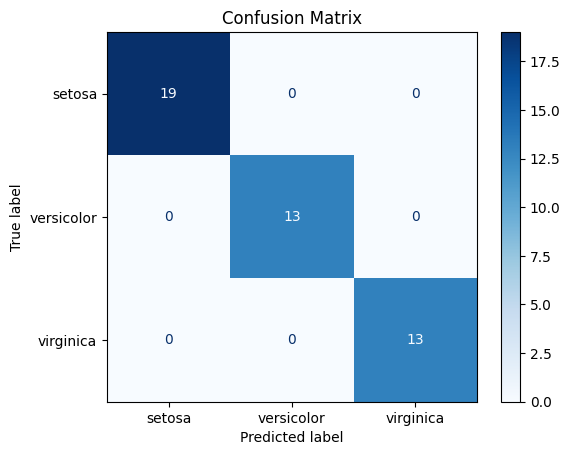

In [28]:

# Evaluate the model on test data
test_loss, test_accuracy = modified_model.evaluate(X_test, y_test, verbose=0)  # Evaluate without verbose output
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")  # Print test loss and accuracy

# Generate predictions for test data
y_pred = modified_model.predict(X_test)  # Predicted probabilities for each class
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels
y_true_classes = np.argmax(y_test, axis=1)  # Convert one-hot encoded labels to class labels

# Print classification report
print("Classification Report:")
print(classification_report(y_true_classes, y_pred_classes, target_names=target_names))

# Visualize confusion matrix
ConfusionMatrixDisplay.from_predictions(y_true_classes, y_pred_classes, display_labels=target_names, cmap="Blues")
plt.title("Confusion Matrix")
plt.show()


## **Step 5: Visualize the Neural Network Architecture**
Display the architecture of the neural network using Keras utilities.

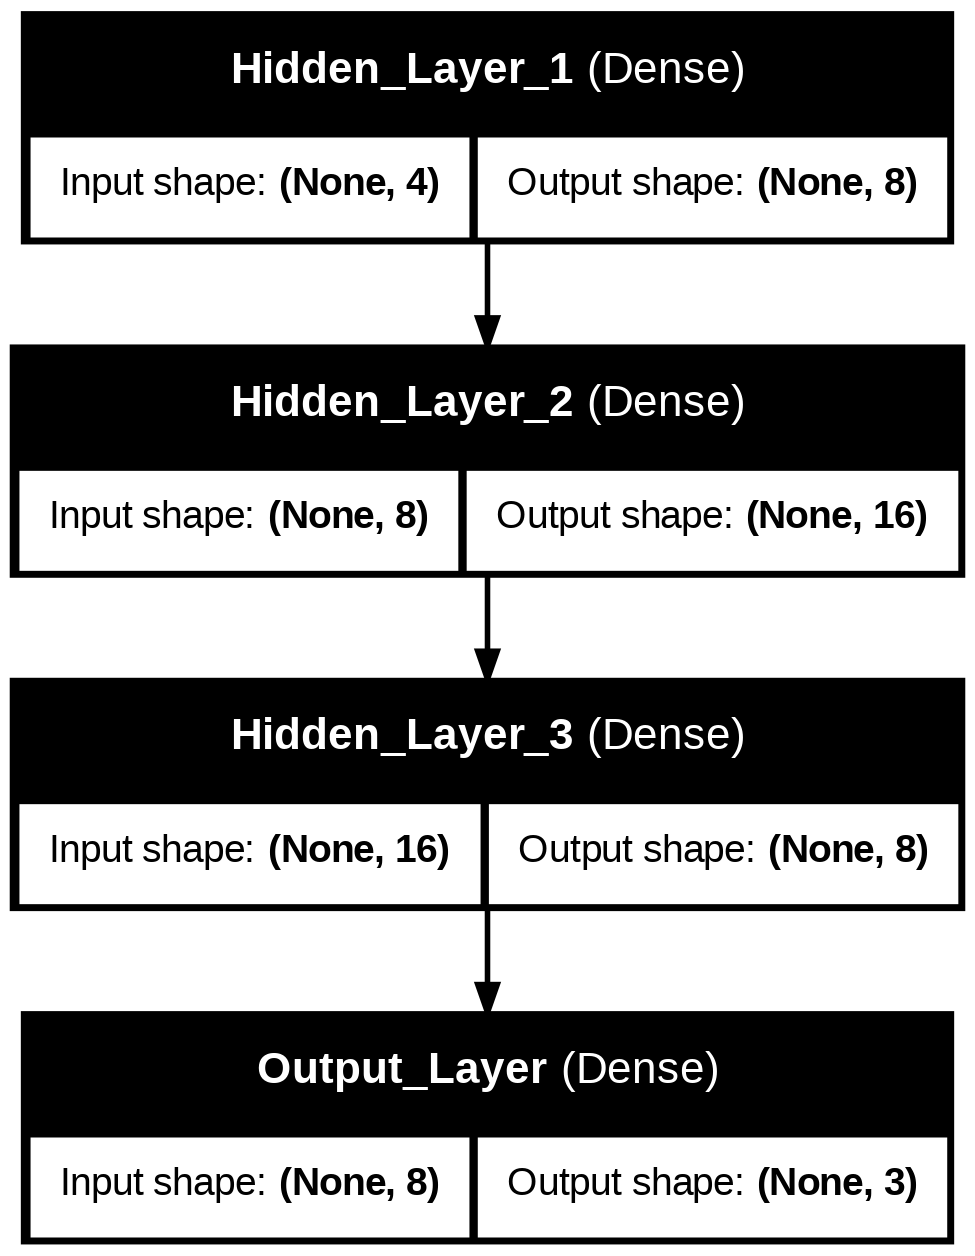

In [27]:

# Visualize the model architecture
from tensorflow.keras.utils import plot_model  # Utility to plot model architecture

# Save the architecture plot
plot_model(modified_model, show_shapes=True, show_layer_names=True, to_file='model_architecture.png')  # Save as PNG

# Display the saved image
from IPython.display import Image
Image(filename='model_architecture.png')
